##LOAN APPROVAL PREDICTION:Using Gradient Boosting $ CatBoost

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv("c:\\Users\\USER\\Downloads\\loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.columns = df.columns.str.strip()
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [6]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64

In [7]:
df.drop(columns=['Loan_ID', 'Loan_Amount_Term'], inplace=True, errors='ignore')

In [8]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,1.0,Rural,Y


##Exploratory Data Analysis(EDA)

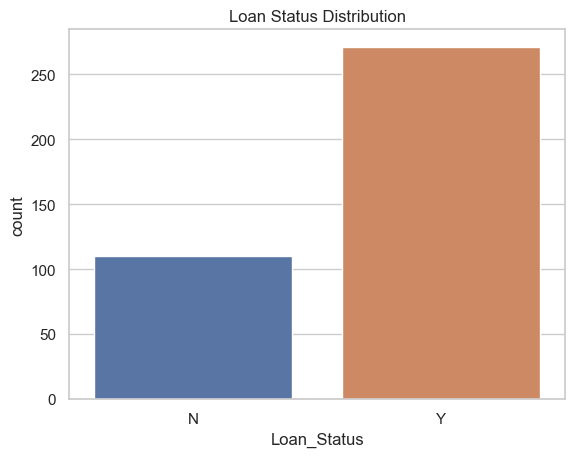

In [9]:
sns.set(style="whitegrid")
#1. loan status count
sns.countplot(data=df,x='Loan_Status',hue='Loan_Status')
plt.title("Loan Status Distribution")
plt.show()

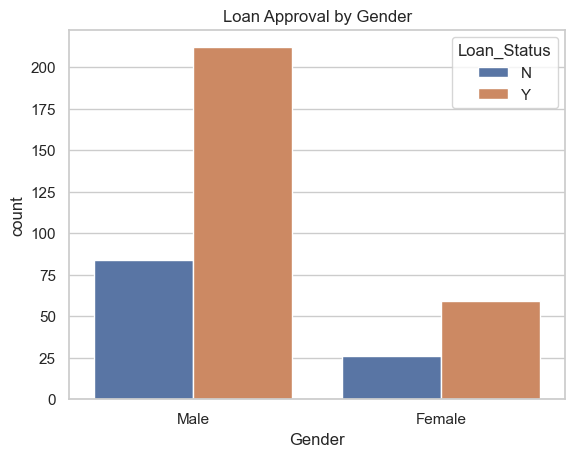

In [10]:
#2.Gender vs loan_status
sns.countplot(data=df,x='Gender',hue='Loan_Status')
plt.title("Loan Approval by Gender")
plt.show()

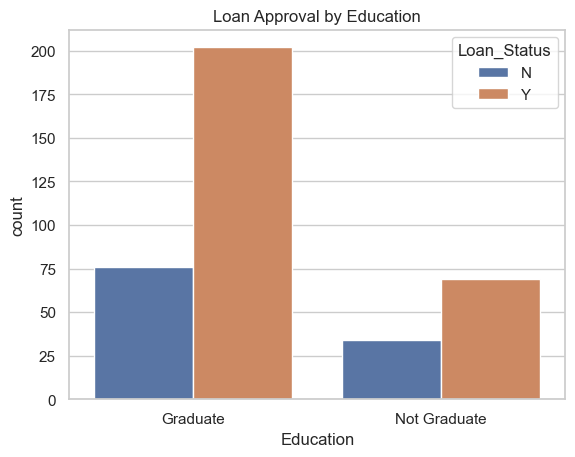

In [11]:
#3.Education vs Loan_status
sns.countplot(data=df,x='Education',hue='Loan_Status')
plt.title("Loan Approval by Education")
plt.show()


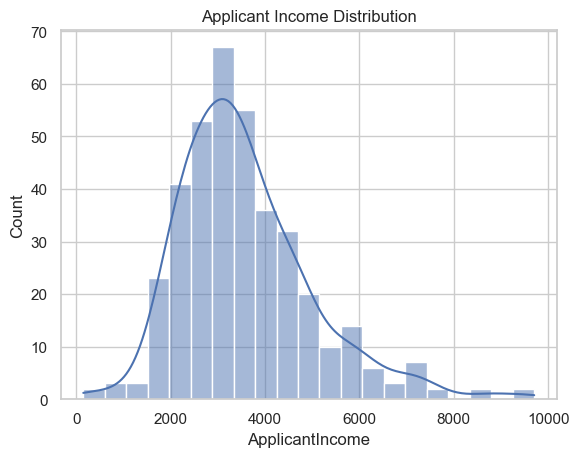

In [12]:
#4.Applicant income distribution
sns.histplot(data=df,x='ApplicantIncome',kde=True)
plt.title("Applicant Income Distribution")
plt.show()

In [13]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})

df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Education'] = df['Education'].map({'Not Graduate': 0, 'Graduate': 1})
df['Dependents'] = (
    df['Dependents']
    .replace('3+', '3')                   
    .fillna('0')                          
    .astype(int)
)
df['Property_Area'] = df['Property_Area'].map({
    'Rural': 0, 'Semiurban': 1, 'Urban': 2
})

In [14]:
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})


In [15]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
#gradient boosting
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Credit_History']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

In [17]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.64      0.33      0.44        21
           1       0.79      0.93      0.85        56

    accuracy                           0.77        77
   macro avg       0.71      0.63      0.64        77
weighted avg       0.75      0.77      0.74        77



In [39]:
#confusion metrics
cm_gb=confusion_matrix(y_test,y_pred)
print("confuion_matrix~Gradient Boosting:\n",cm_gb)

confuion_matrix~Gradient Boosting:
 [[ 7 14]
 [ 4 52]]


In [18]:
new_data=pd.DataFrame([{'Gender':1,'Married':1,'Dependents':0,'Education':0,'Self_Employed':0,'ApplicantIncome':6000,'CoapplicantIncome':2500,
                        'LoanAmount':141,'Credit_History':1,'Property_Area':2}])
new_data
                        

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,1,0,0,0,6000,2500,141,1,2


In [19]:
prediction=gb.predict(new_data)
if prediction[0]==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved


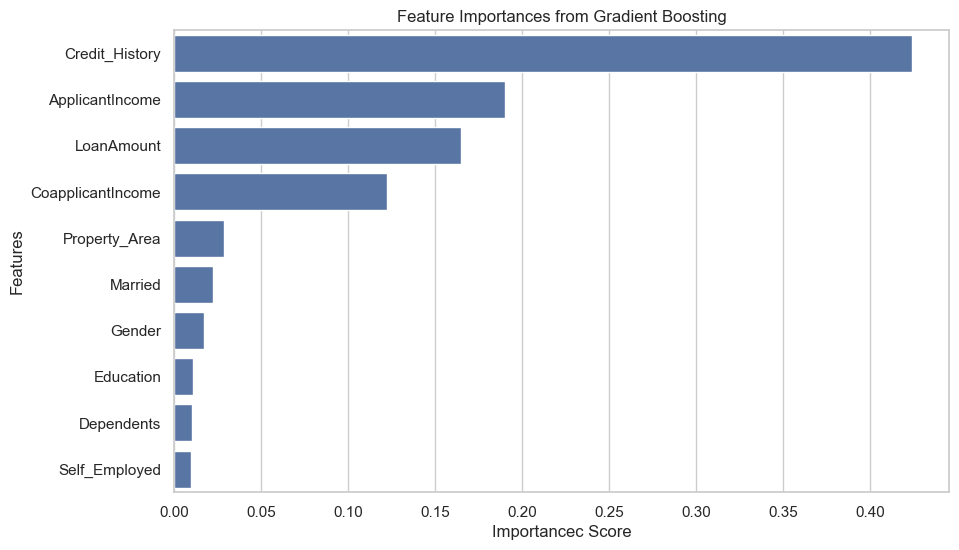

In [20]:
#Feature Importance
feature_imp=pd.Series(gb.feature_importances_,index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.title("Feature Importances from Gradient Boosting")
plt.xlabel("Importancec Score")
plt.ylabel("Features")
plt.show()

In [21]:
#CatBoost classifier
from catboost import CatBoostClassifier
print("CatBoost imported successfully!")

CatBoost imported successfully!


In [22]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
categorical_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']

In [24]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [25]:
for col in categorical_cols:
    X_train[col] = X_train[col].fillna('NA').astype(str)
    X_test[col]  = X_test[col].fillna('NA').astype(str)

In [26]:
#Buid CastBoost model
cat_model=CatBoostClassifier(verbose=0,random_state=42)
cat_model.fit(X_train,y_train,cat_features=categorical_cols)

In [27]:
y_pred_cat=cat_model.predict(X_test)

In [28]:
#Evaluation
print("CatBoost Accuracy:",accuracy_score(y_test,y_pred_cat))
print(classification_report(y_test,y_pred_cat))

CatBoost Accuracy: 0.8181818181818182
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77



In [29]:
#prediction on new_data
new_data=pd.DataFrame([{'Gender':1,'Married':1,'Dependents':0,'Education':0,'Self_Employed':0,'ApplicantIncome':6000,'CoapplicantIncome':2500,
                        'LoanAmount':141,'Credit_History':1,'Property_Area':2}])
new_data
           

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,1,0,0,0,6000,2500,141,1,2


In [30]:
prediction=cat_model.predict(new_data)
if prediction[0]==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


In [31]:
cat_model.predict_proba(new_data)
gb.predict_proba(new_data)

array([[0.21269189, 0.78730811]])

In [32]:
proba=cat_model.predict_proba(new_data)
if proba[0][1]>0.5:
     print("Loan Approved")
else:
    print("Loan Not Approved")
    

Loan Not Approved


In [40]:
#confusion metrics
cm_cat=confusion_matrix(y_test,y_pred_cat)
print("Confusion matrix~CatBoost:\n",cm_gb)

Confusion matrix~CatBoost:
 [[ 7 14]
 [ 4 52]]


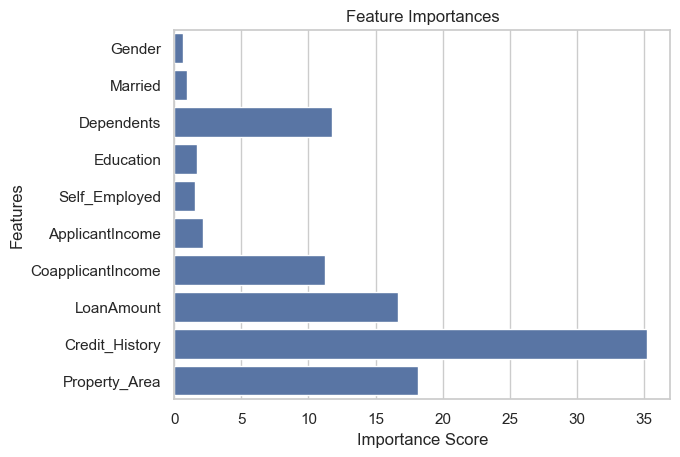

In [44]:
#feature importance
feat_importances = cat_model.get_feature_importance()
features = X.columns
sns.barplot(x=feat_importances, y=features)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [35]:
#compare metrics
print("Gradient Boosting Accuracy:",accuracy_score(y_test,y_pred))
print("CatBoost Accuracy:",accuracy_score(y_test,y_pred_cat))

Gradient Boosting Accuracy: 0.7662337662337663
CatBoost Accuracy: 0.8181818181818182


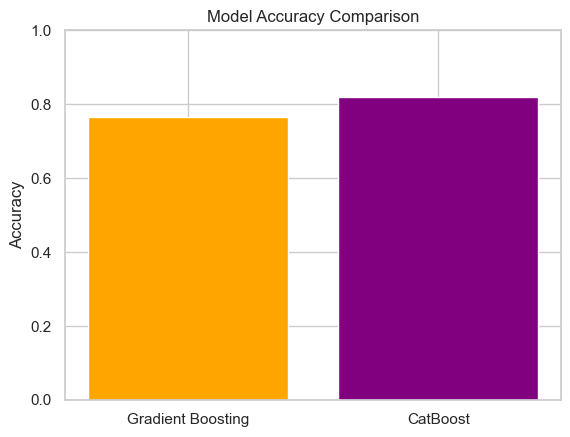

In [36]:
#bar chart
models=['Gradient Boosting','CatBoost']
accuracy=[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred_cat)]
plt.bar(models,accuracy,color=['orange','purple'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()